In [1]:
import pandas as pd
import numpy as np

from exchange import *
from agents import *

import matplotlib.pyplot as plt
import random
from scipy.stats import bernoulli

# Exchange Visualization

In [2]:
e = Exchange()

e.add_bid(100, 5, "1", None)
e.add_bid(102, 2, "2", None)
e.add_bid(103, 3, "3", None)
e.add_bid(104, 4, "4", None)
e.add_bid(105, 10, "5", None)
e.add_ask(106, 8, "6", None)
e.add_ask(107, 3, "7", None)
e.add_ask(109, 12, "8", None)
e.add_ask(110, 6, "9", None)
e.add_ask(115, 4, "10", None)

In [3]:
def show_exchange(exchange):
    bidPrices = list(exchange.bids.keys())
    bidQtys = list(exchange.bids.values())
    askPrices = list(exchange.asks.keys())
    askQtys = list(exchange.asks.values())

    plt.figure(figsize=(3, 5))
    plt.barh(bidPrices, bidQtys, color="green", label=f"bid qty: {sum(bidQtys)}")
    plt.barh(askPrices, askQtys, color="red", label=f"ask qty: {sum(askQtys)}")
    plt.legend()
    plt.ylabel("price")
    plt.xlabel("qty")
    plt.title("Exchange Ladder")

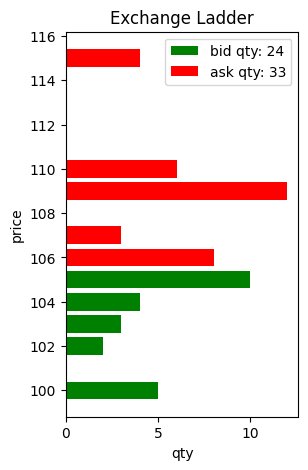

In [4]:
show_exchange(e)

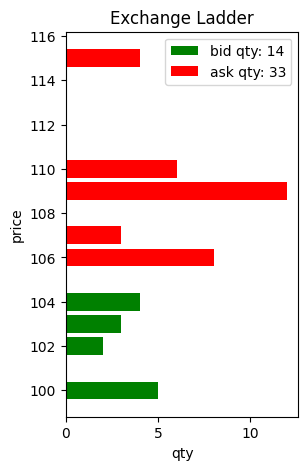

In [5]:
e.add_ask(105, 10, "11", None)
show_exchange(e)

# Simulation Elements

In [6]:
'''
# TODO: agent arrival process
# TODO: agent cancel duration
# TODO: true price movement changing (variance over time)
# TODO: agent reading true price (with some noise)
# TODO: agent aggression level (bid / ask)
# TODO: agent interaction logic with exchange
'''


'\n# TODO: agent arrival process\n# TODO: agent cancel duration\n# TODO: true price movement changing (variance over time)\n# TODO: agent reading true price (with some noise)\n# TODO: agent aggression level (bid / ask)\n# TODO: agent interaction logic with exchange\n'

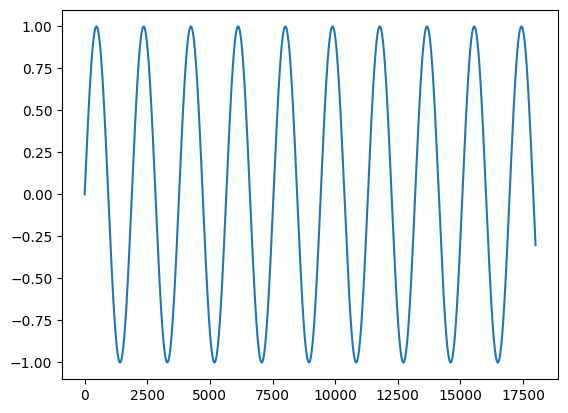

In [7]:
x = np.arange(0, 5 * 60 * 60)
T = 60 * 5 # period
y = np.sin(x / T)
plt.plot(x, y)

In [8]:
t = 40
true_price = np.sin(t / T)
true_price

0.13293862262231407

In [9]:
e.asks

defaultdict(<function exchange.Exchange.add_ask.<locals>.<lambda>()>,
            {106: 8, 107: 3, 109: 12, 110: 6, 115: 4})

In [10]:
e.ask_customers

{'6': (106, 0, 8, None),
 '7': (107, 0, 3, None),
 '8': (109, 0, 12, None),
 '9': (110, 0, 6, None),
 '10': (115, 0, 4, None)}

In [28]:
def execute_policy(e: Exchange):
    a = SimplePolicy(100)
    # a = TightPolicy(100)
    e.add_order(a)

In [53]:
# pre-determine some true price curve as a function of time
# can begin as uniform
e = Exchange()

### defining hyperparameters ###
agent_arrival_rate = 0.1
taker_probability = 0.4

price_function = lambda t: 100
# future price functions can incorporate like lagged information when the agents read it 
# true_price_func = lambda t: np.sin(t / 5*60)
customer_id = 1
count = 0

while e.get_timestamp() < 1000:     
    ### pseudo code this ###

    # agent arrives by some exponential inter-arrival time simulating poisson
    # increment timestamp by exponential variable
    # calculate agent's characteristics (aggression level, theo value, cancel duration)
    # first check existing cancel queue, remove orders if necessary
    # add agent's bid/asks to exchange
    # plot exchange
    # sidenote: also need to increment customerids

    # add in own policy logic 

    ### ------------------------------------------------------------ ###

    # agents arrive at same rate, some probability they are maker vs taker
    agent_arrival_time = random.expovariate(agent_arrival_rate)
    execute_policy(e)

    e.increment_timestamp(agent_arrival_time)
    e.check_cancelled_orders()

    order_duration_sd = 0.0 # placeholder
    theo_sd = 2.5
    agent_is_taker = random.random() < taker_probability
    if not agent_is_taker:
        mvn_skews = [8, 0]
        mvn_means = [2, 10]
        mvn_cov = [[9, -5.625], [-5.625, 6.25]]

        a = Maker((mvn_skews, mvn_means, mvn_cov), order_duration_sd, theo_sd, price_function(e.get_timestamp()), customer_id)
    
    else: 
        mvn_skews = [8, 0]
        mvn_means = [2, 20]
        mvn_cov = [[9, -9], [-9, 16]]
        
        a = Taker((mvn_skews, mvn_means, mvn_cov), order_duration_sd, theo_sd, price_function(e.get_timestamp()), customer_id)

    e.add_order(a)

    print(e.get_timestamp())
    customer_id += 1

22.9496472690299
25.884718006271203
31.119482987673535
43.47021424983755
91.68740691664331
110.88459455317428
123.98505312170195
128.39028948163536
131.48336175225458
152.51317511707927
155.70893407949598
158.6299051286414
165.80151446203928
166.36310894317302
170.37829301303404
178.9347851202878
179.8375383962101
187.53330618291645
215.47626005641223
218.24104143267385
218.8454219219363
219.82925567026447
226.13775528364278
239.73818862393338
244.32964957702112
255.2169778207321
258.37364619030393
265.3638392541391
289.2071095385353
306.14301684817116
308.4713511775609
308.892694945188
313.97662458822396
318.5363176542224
339.10747845118107
343.3926181725129
344.18861057128294
356.49180075840053
361.1175582125534
361.733351968661
374.8686954525725
394.5963692052668
398.8578788471561
414.0370923728465
424.07383847908153
432.46792531119394
438.98545574085125
445.88317336900735
449.4627734477456
468.4276529937878
475.34482637582886
478.47181279033464
501.89593998380053
506.58104656049363

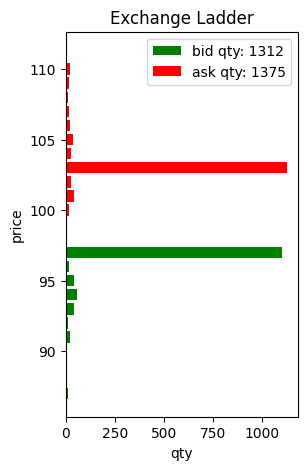

In [54]:
show_exchange(e)

In [31]:
e.ask_customers

{81: (101, 888.4122498650937, 10, <agents.Taker at 0x7fbadaafa9d0>),
 49: (102, 567.0297377542142, 11, <agents.Maker at 0x7fbadac43550>),
 56: (102, 623.7676430540317, 7, <agents.Maker at 0x7fbada28f0d0>),
 58: (102, 671.0626970960171, 7, <agents.Maker at 0x7fbadaa9bc10>),
 68: (102, 770.7484329146585, 8, <agents.Maker at 0x7fbad5b432b0>),
 78: (102, 869.7549796166728, 24, <agents.Taker at 0x7fbadaaa8100>),
 50: (103, 577.9975019187362, 8, <agents.Maker at 0x7fbada28f460>),
 53: (103, 592.8049822378191, 8, <agents.Maker at 0x7fbada28fcd0>),
 61: (103, 694.3346827427192, 18, <agents.Taker at 0x7fbadabc0fd0>),
 73: (103, 832.6852934384955, 6, <agents.Maker at 0x7fbadaae3190>),
 80: (103, 886.566758099513, 8, <agents.Maker at 0x7fbadaf5c130>),
 59: (104, 674.0166305452982, 7, <agents.Maker at 0x7fbada28fdf0>),
 83: (104, 897.6091166584691, 9, <agents.Maker at 0x7fbada956160>),
 84: (104, 927.4070067040604, 8, <agents.Maker at 0x7fbadaf57dc0>),
 86: (104, 972.0430242867579, 11, <agents.Mak

In [32]:
e.bid_customers

{51: (99, 582.2658760182119, 2, <agents.Maker at 0x7fbada28fee0>),
 64: (99, 728.5703696498912, 8, <agents.Maker at 0x7fbadaf0c6a0>),
 66: (99, 744.4422481053108, 6, <agents.Maker at 0x7fbadaab6a90>),
 75: (99, 845.3539429793015, 9, <agents.Maker at 0x7fbadaaa8220>),
 79: (99, 876.1691218765754, 16, <agents.Taker at 0x7fbadab64d30>),
 82: (99, 892.7645973842335, 7, <agents.Maker at 0x7fbadaafae50>),
 88: (99, 984.4737231617049, 10, <agents.Maker at 0x7fbadac322b0>),
 54: (98, 609.1913792472935, 9, <agents.Maker at 0x7fbadaf43100>),
 59: (98, 674.0166305452982, 7, <agents.Maker at 0x7fbada28fdf0>),
 84: (98, 927.4070067040604, 8, <agents.Maker at 0x7fbadaf57dc0>),
 86: (98, 972.0430242867579, 11, <agents.Maker at 0x7fbadac43f40>),
 55: (97, 623.6927170190551, 12, <agents.Maker at 0x7fbadaaf5d30>),
 80: (97, 886.566758099513, 8, <agents.Maker at 0x7fbadaf5c130>),
 44: (96, 532.0862967869123, 11, <agents.Maker at 0x7fbadac43100>),
 68: (96, 770.7484329146585, 8, <agents.Maker at 0x7fbad5b

In [33]:
# function to parse transactions from exchange
def summarize_transactions(ex: Exchange):
    arr = ex.get_transactions()
    # arr

    df = pd.DataFrame(arr)
    long = df[["bid_customerid", "price", "quantity", "timestamp", "aggressor_side"]]
    long["customer_side"] = ["bid"] * len(long)
    long = long.rename(columns={"bid_customerid": "customer_id"})
    short = df[["ask_customerid", "price", "quantity", "timestamp", "aggressor_side"]]
    short["customer_side"] = ["ask"] * len(long)
    short = short.rename(columns={"ask_customerid": "customer_id"})
    short.loc[:, "quantity"] = -1 * short["quantity"]

    summary = pd.concat([long, short], axis=0).sort_values("timestamp")
    summary["true_profit"] = (price_function(summary["timestamp"]) - summary["price"]) * summary["quantity"]
    return summary, df

In [34]:
summary, df = summarize_transactions(e)

s = summary.groupby("customer_id").sum("true_profit").sort_values("true_profit", ascending=False)
s.head()

/var/folders/y9/l2z6fxk97j32t00jbm20rm6w0000gn/T/ipykernel_51175/1890595631.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
/var/folders/y9/l2z6fxk97j32t00jbm20rm6w0000gn/T/ipykernel_51175/1890595631.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


,price,quantity,timestamp,true_profit
customer_id,,,,
14,105,-21,373.403768,105
51,97,12,976.231250,36
2,200,0,200.247531,32
8,102,-15,153.811320,30
70,98,14,853.450122,28


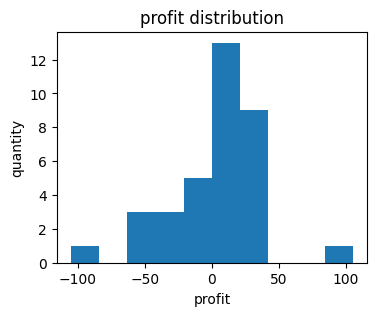

In [44]:
plt.figure(figsize=(4, 3))
plt.hist(s["true_profit"])
plt.title("profit distribution")
plt.xlabel("profit")
plt.ylabel("quantity")
plt.show()
# assuming no price change and instant liquidation

In [36]:
s.iloc[0]

price          105.000000
quantity       -21.000000
timestamp      373.403768
true_profit    105.000000
Name: 14, dtype: float64

In [37]:
summary[summary["customer_id"] == s.index[0]]

,customer_id,price,quantity,timestamp,aggressor_side,customer_side,true_profit
6,14,105,-21,373.403768,bid,ask,105


In [38]:
e.orders[s.index[0]]

{'ask': (101, 25)}

In [39]:
summary[summary["customer_id"] == s.index[-1]]

,customer_id,price,quantity,timestamp,aggressor_side,customer_side,true_profit
6,31,105,21,373.403768,bid,bid,-105


In [40]:
e.orders[s.index[-1]]

{'bid': (105, 21)}